## Import

In [2]:
# Matplotlib
import matplotlib.pyplot
# Tensorflow
import tensorflow
# Numpy and Pandas
import numpy
import pandas
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler


## Be sure to used Tensorflow 2.0

In [3]:
assert hasattr(tensorflow, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [4]:
from sklearn.model_selection import train_test_split

# Fashio MNIST
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


## Plot one of the data

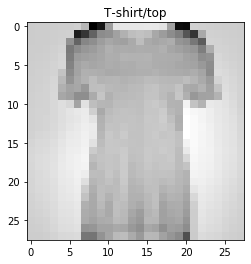

In [8]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
matplotlib.pyplot.imshow(images[10].reshape(28, 28), cmap="binary")
matplotlib.pyplot.title(targets_names[targets[10]])
matplotlib.pyplot.title(targets_names[targets[10]])
matplotlib.pyplot.show()

In [9]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Add the layers

In [10]:
# Flatten
model = tensorflow.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tensorflow.keras.layers.Dense(256, activation="relu"))
model.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model.add(tensorflow.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.13569498 0.04130819 0.02080214 0.10700066 0.04358333 0.05535764
  0.03483947 0.17577486 0.11827039 0.26736838]] [9]


## Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [17]:
history = model.fit(images_train, targets_train, epochs=150, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/150
6400/6400 [==============================] - 0s 59us/sample - loss: 0.5899 - accuracy: 0.7955 - val_loss: 0.6375 - val_accuracy: 0.7713
Epoch 2/150
6400/6400 [==============================] - 0s 54us/sample - loss: 0.5723 - accuracy: 0.8008 - val_loss: 0.6239 - val_accuracy: 0.7812
Epoch 3/150
6400/6400 [==============================] - 0s 58us/sample - loss: 0.5567 - accuracy: 0.8061 - val_loss: 0.6107 - val_accuracy: 0.7819
Epoch 4/150
6400/6400 [==============================] - 1s 79us/sample - loss: 0.5424 - accuracy: 0.8123 - val_loss: 0.6004 - val_accuracy: 0.7844
Epoch 5/150
6400/6400 [==============================] - 1s 98us/sample - loss: 0.5295 - accuracy: 0.8175 - val_loss: 0.5901 - val_accuracy: 0.7869
Epoch 6/150
6400/6400 [==============================] - 1s 102us/sample - loss: 0.5177 - accuracy: 0.8220 - val_loss: 0.5815 - val_accuracy: 0.7912
Epoch 7/150
6400/6400 [==============================] - 1s 83u

Epoch 56/150
6400/6400 [==============================] - 0s 70us/sample - loss: 0.2992 - accuracy: 0.8998 - val_loss: 0.4618 - val_accuracy: 0.8356
Epoch 57/150
6400/6400 [==============================] - 0s 62us/sample - loss: 0.2968 - accuracy: 0.9014 - val_loss: 0.4612 - val_accuracy: 0.8331
Epoch 58/150
6400/6400 [==============================] - 0s 55us/sample - loss: 0.2950 - accuracy: 0.9017 - val_loss: 0.4597 - val_accuracy: 0.8363
Epoch 59/150
6400/6400 [==============================] - 0s 55us/sample - loss: 0.2927 - accuracy: 0.9031 - val_loss: 0.4589 - val_accuracy: 0.8369
Epoch 60/150
6400/6400 [==============================] - 0s 55us/sample - loss: 0.2907 - accuracy: 0.9047 - val_loss: 0.4590 - val_accuracy: 0.8344
Epoch 61/150
6400/6400 [==============================] - 0s 55us/sample - loss: 0.2885 - accuracy: 0.9044 - val_loss: 0.4591 - val_accuracy: 0.8356
Epoch 62/150
6400/6400 [==============================] - 0s 62us/sample - loss: 0.2866 - accuracy: 0.9047

Epoch 111/150
6400/6400 [==============================] - 0s 56us/sample - loss: 0.2083 - accuracy: 0.9366 - val_loss: 0.4433 - val_accuracy: 0.8419
Epoch 112/150
6400/6400 [==============================] - 0s 50us/sample - loss: 0.2071 - accuracy: 0.9378 - val_loss: 0.4437 - val_accuracy: 0.8450
Epoch 113/150
6400/6400 [==============================] - 0s 52us/sample - loss: 0.2058 - accuracy: 0.9384 - val_loss: 0.4425 - val_accuracy: 0.8413
Epoch 114/150
6400/6400 [==============================] - 0s 52us/sample - loss: 0.2045 - accuracy: 0.9394 - val_loss: 0.4421 - val_accuracy: 0.8425
Epoch 115/150
6400/6400 [==============================] - 0s 52us/sample - loss: 0.2032 - accuracy: 0.9388 - val_loss: 0.4426 - val_accuracy: 0.8431
Epoch 116/150
6400/6400 [==============================] - 0s 49us/sample - loss: 0.2022 - accuracy: 0.9405 - val_loss: 0.4431 - val_accuracy: 0.8469
Epoch 117/150
6400/6400 [==============================] - 0s 52us/sample - loss: 0.2005 - accuracy:

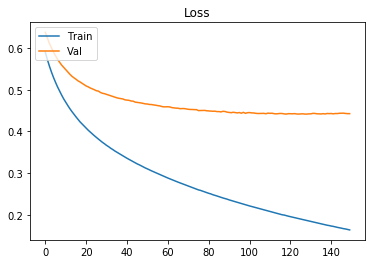

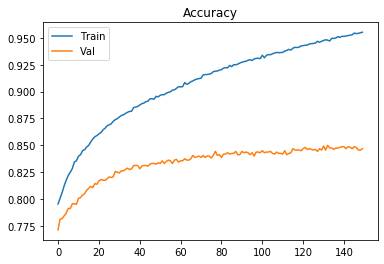

In [18]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

matplotlib.pyplot.plot(loss_curve, label="Train")
matplotlib.pyplot.plot(loss_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Loss")
matplotlib.pyplot.show()

matplotlib.pyplot.plot(acc_curve, label="Train")
matplotlib.pyplot.plot(acc_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()

In [19]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test loss", loss)
print("Train accuracy", acc)

2000/2000 [==============================] - 0s 34us/sample - loss: 0.4293 - accuracy: 0.8595
Test loss 0.42934793841838836
Train accuracy 0.8595
